# Plotting

- generating plots
- styling and outputting
- simple plot() use matplotlib under the hood
----

## Matplotlib

Glossary
- Subplot = axes
- Figure - final output, can be a single plot or multi-subplot

----

In [3]:
import pandas as pd
import os

In [4]:
df = pd.read_pickle("data_frame.pickle")
df.head()

,artist,title,medium,year,acquisitionYear,width,height,units
id,,,,,,,,
1035,"Blake, Robert",A Figure Bowing before a Seated Old Man with h...,"Watercolour, ink, chalk and graphite on paper....",NaN,1922.0,394,419,mm
1036,"Blake, Robert","Two Drawings of Frightened Figures, Probably f...",Graphite on paper,NaN,1922.0,311,213,mm
1037,"Blake, Robert",The Preaching of Warning. Verso: An Old Man En...,Graphite on paper. Verso: graphite on paper,1785,1922.0,343,467,mm
1038,"Blake, Robert",Six Drawings of Figures with Outstretched Arms,Graphite on paper,NaN,1922.0,318,394,mm
1039,"Blake, William",The Circle of the Lustful: Francesca da Rimini...,Line engraving on paper,1826,1919.0,243,335,mm


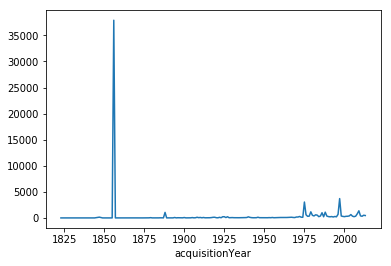

In [5]:
acq_years = df.groupby('acquisitionYear').size()
acq_years.plot()

----

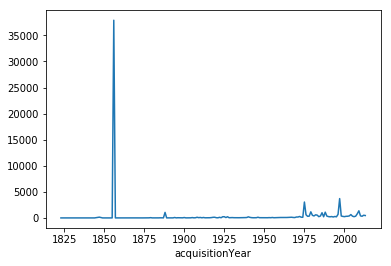

In [25]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True, 'axes.titlepad': 20})

fig = plt.figure()
subplot = fig.add_subplot(1, 1, 1)
acq_years.plot(ax=subplot)

# Resolve tight layout warning
fig.set_tight_layout(False)

# don't use .show(), in jupyter
#fig.show()

The above code is euivalent to plot(), but we can customize this much more

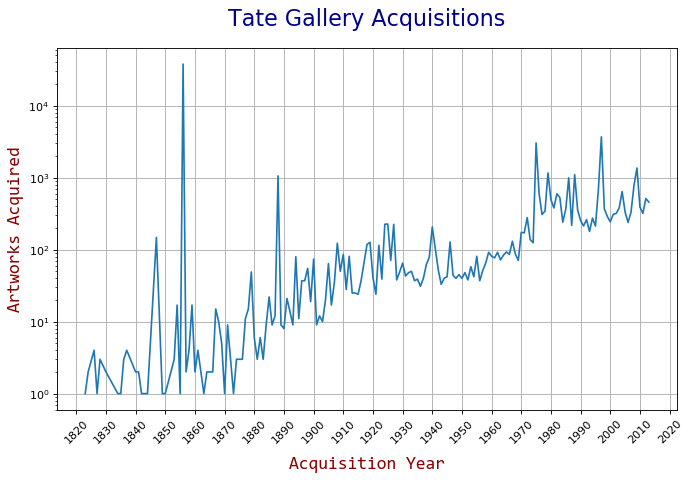

In [43]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams.update({'figure.autolayout': True, 'axes.titlepad': 20})

# set size of figure
fig = plt.figure( figsize=(10, 6), dpi=80)

subplot = fig.add_subplot(1, 1, 1)
# set rotation of x labels so they can be read
# Set vertical scale to logarithmic for better layout
# show grid
acq_years.plot(ax=subplot, rot=45, logy=True, grid=True) 

# Configure Labels
labels_font = {
    'family' : 'consolas',
    'color' : 'darkred',
    'weight' : 'normal',
    'size' : 16,
}
subplot.set_xlabel('Acquisition Year', fontdict=labels_font, labelpad=10)
subplot.set_ylabel('Artworks Acquired', fontdict=labels_font)
subplot.locator_params(nbins=40, axis='x')

# Configure Title
title_font = {
    'family' : 'dejavu sans',
    'color' : 'darkblue',
    'weight' : 'normal',
    'size' : 20,
}
subplot.set_title("Tate Gallery Acquisitions", fontdict=title_font)

fig.set_tight_layout(False)

In [44]:
fig.savefig('plot.png')

In [45]:
fig.savefig('plot.svg', format='svg')